The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

==================== SCENARIO: BALANCED OUTLOOK (BUY VS RENT) - MORTGAGE ====================

--- Running with Configuration ---
  Number of simulations: 10,000
  Property Value Initial: £580,000
  Initial Annual Rent:    £32,400
  Holding Period:         10 years
  Initial Service Charge: £6,500 p.a.
  Mortgage Term:         25 years
  Loan-to-Value:         75%
  Initial Mortgage Rate: 4.5%
  Remortgage Interval:   5 years
  Cash Available:        £200,000

Distribution Assumptions (Mean / Std Dev):
  Property Apprec.:       3.0% / 5.0%
  Alt. Investment Ret.:    5.0% / 8.0%
  Service Chg Infl.:      5.0% / 3.0%
  Rent Inflation:         10.0% / 4.0%
  Mortgage Rate:         4.5% / 1.5%

--- Running 10,000 Simulations ---
Duration: 21.53 seconds

--- Processing Results ---

--- Analysis for: Balanced Outlook (Buy vs Rent) - Mortgage ---

Summary Statistics:
                net_gain              

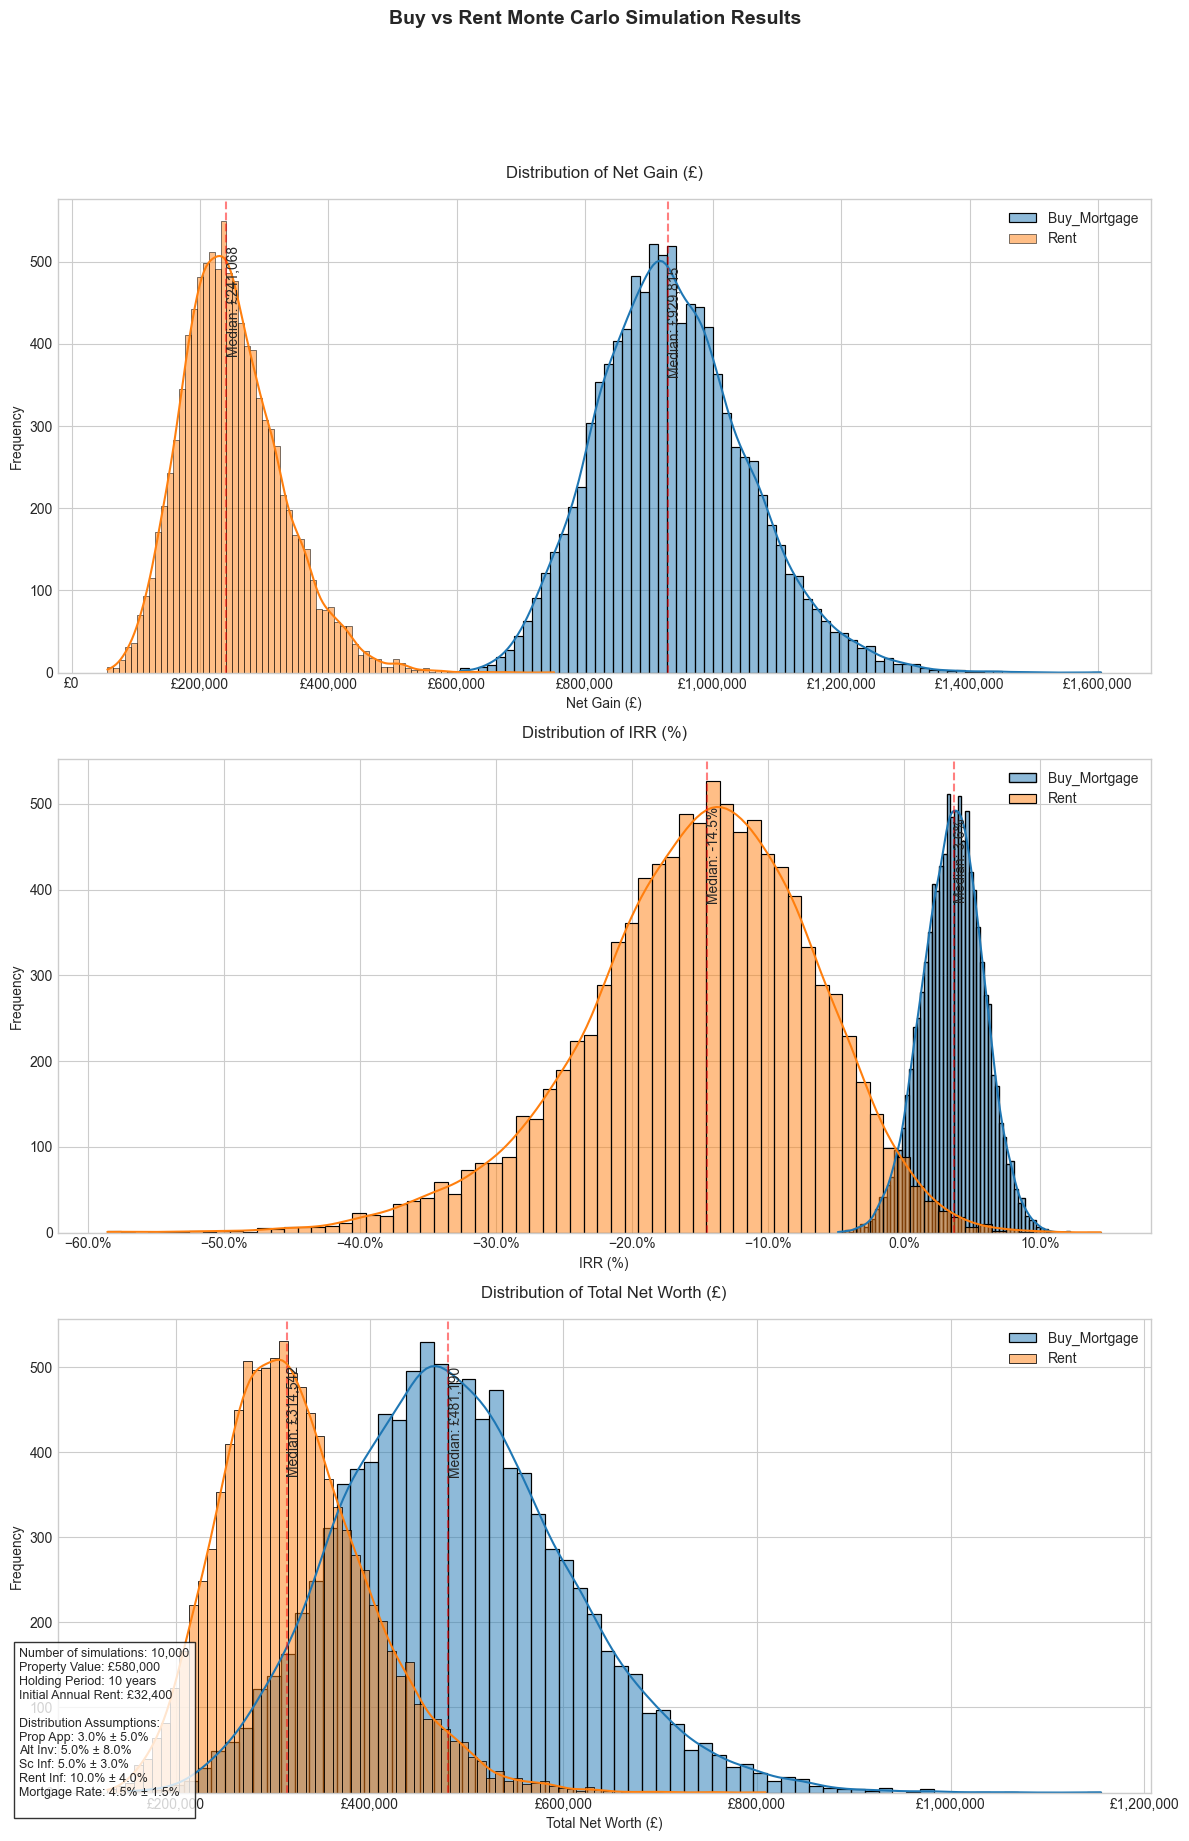

==================== END SCENARIO: BALANCED OUTLOOK (BUY VS RENT) - MORTGAGE ====================

Not enough cash available to buy the property outright for the cash scenario (Balanced Outlook).

==================== SCENARIO: HIGH INFLATION (BUY VS RENT) - MORTGAGE ====================

--- Running with Configuration ---
  Number of simulations: 10,000
  Property Value Initial: £580,000
  Initial Annual Rent:    £32,400
  Holding Period:         10 years
  Initial Service Charge: £6,500 p.a.
  Mortgage Term:         25 years
  Loan-to-Value:         75%
  Initial Mortgage Rate: 4.5%
  Remortgage Interval:   5 years
  Cash Available:        £200,000

Distribution Assumptions (Mean / Std Dev):
  Property Apprec.:       3.0% / 5.0%
  Alt. Investment Ret.:    4.5% / 8.0%
  Service Chg Infl.:      5.0% / 3.0%
  Rent Inflation:         10.0% / 4.0%
  Mortgage Rate:         4.5% / 1.5%

--- Running 10,000 Simulations ---
Duration: 22.17 seconds

--- Processing Results ---

--- Analysis for:

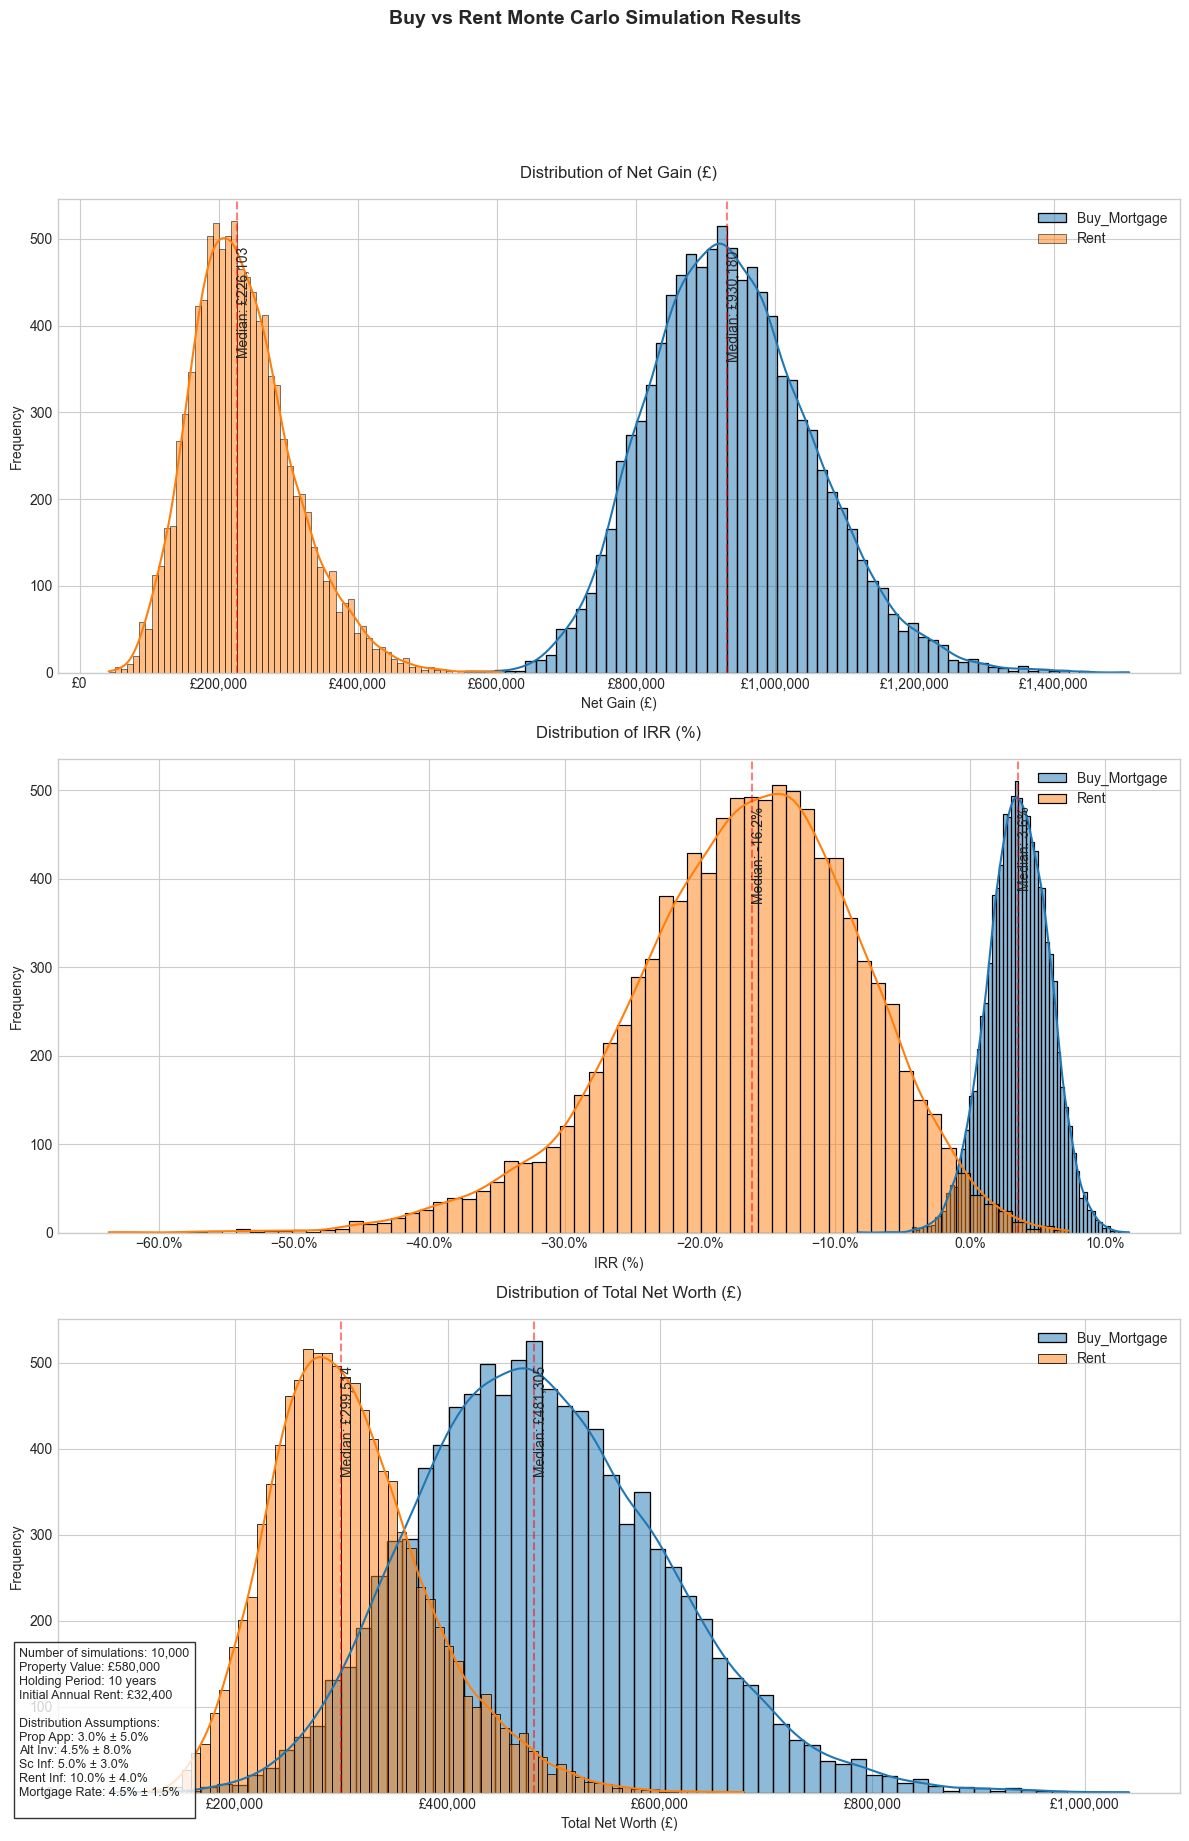

==================== END SCENARIO: HIGH INFLATION (BUY VS RENT) - MORTGAGE ====================

Not enough cash available to buy the property outright for the cash scenario (High Inflation).

==================== SCENARIO: STAGNANT PROPERTY - MORTGAGE ====================

--- Running with Configuration ---
  Number of simulations: 10,000
  Property Value Initial: £580,000
  Initial Annual Rent:    £32,400
  Holding Period:         10 years
  Initial Service Charge: £6,500 p.a.
  Mortgage Term:         25 years
  Loan-to-Value:         75%
  Initial Mortgage Rate: 4.5%
  Remortgage Interval:   5 years
  Cash Available:        £200,000

Distribution Assumptions (Mean / Std Dev):
  Property Apprec.:       0.0% / 5.0%
  Alt. Investment Ret.:    4.5% / 8.0%
  Service Chg Infl.:      5.0% / 3.0%
  Rent Inflation:         10.0% / 4.0%
  Mortgage Rate:         4.5% / 1.5%

--- Running 10,000 Simulations ---
Duration: 20.67 seconds

--- Processing Results ---

--- Analysis for: Stagnant Prope

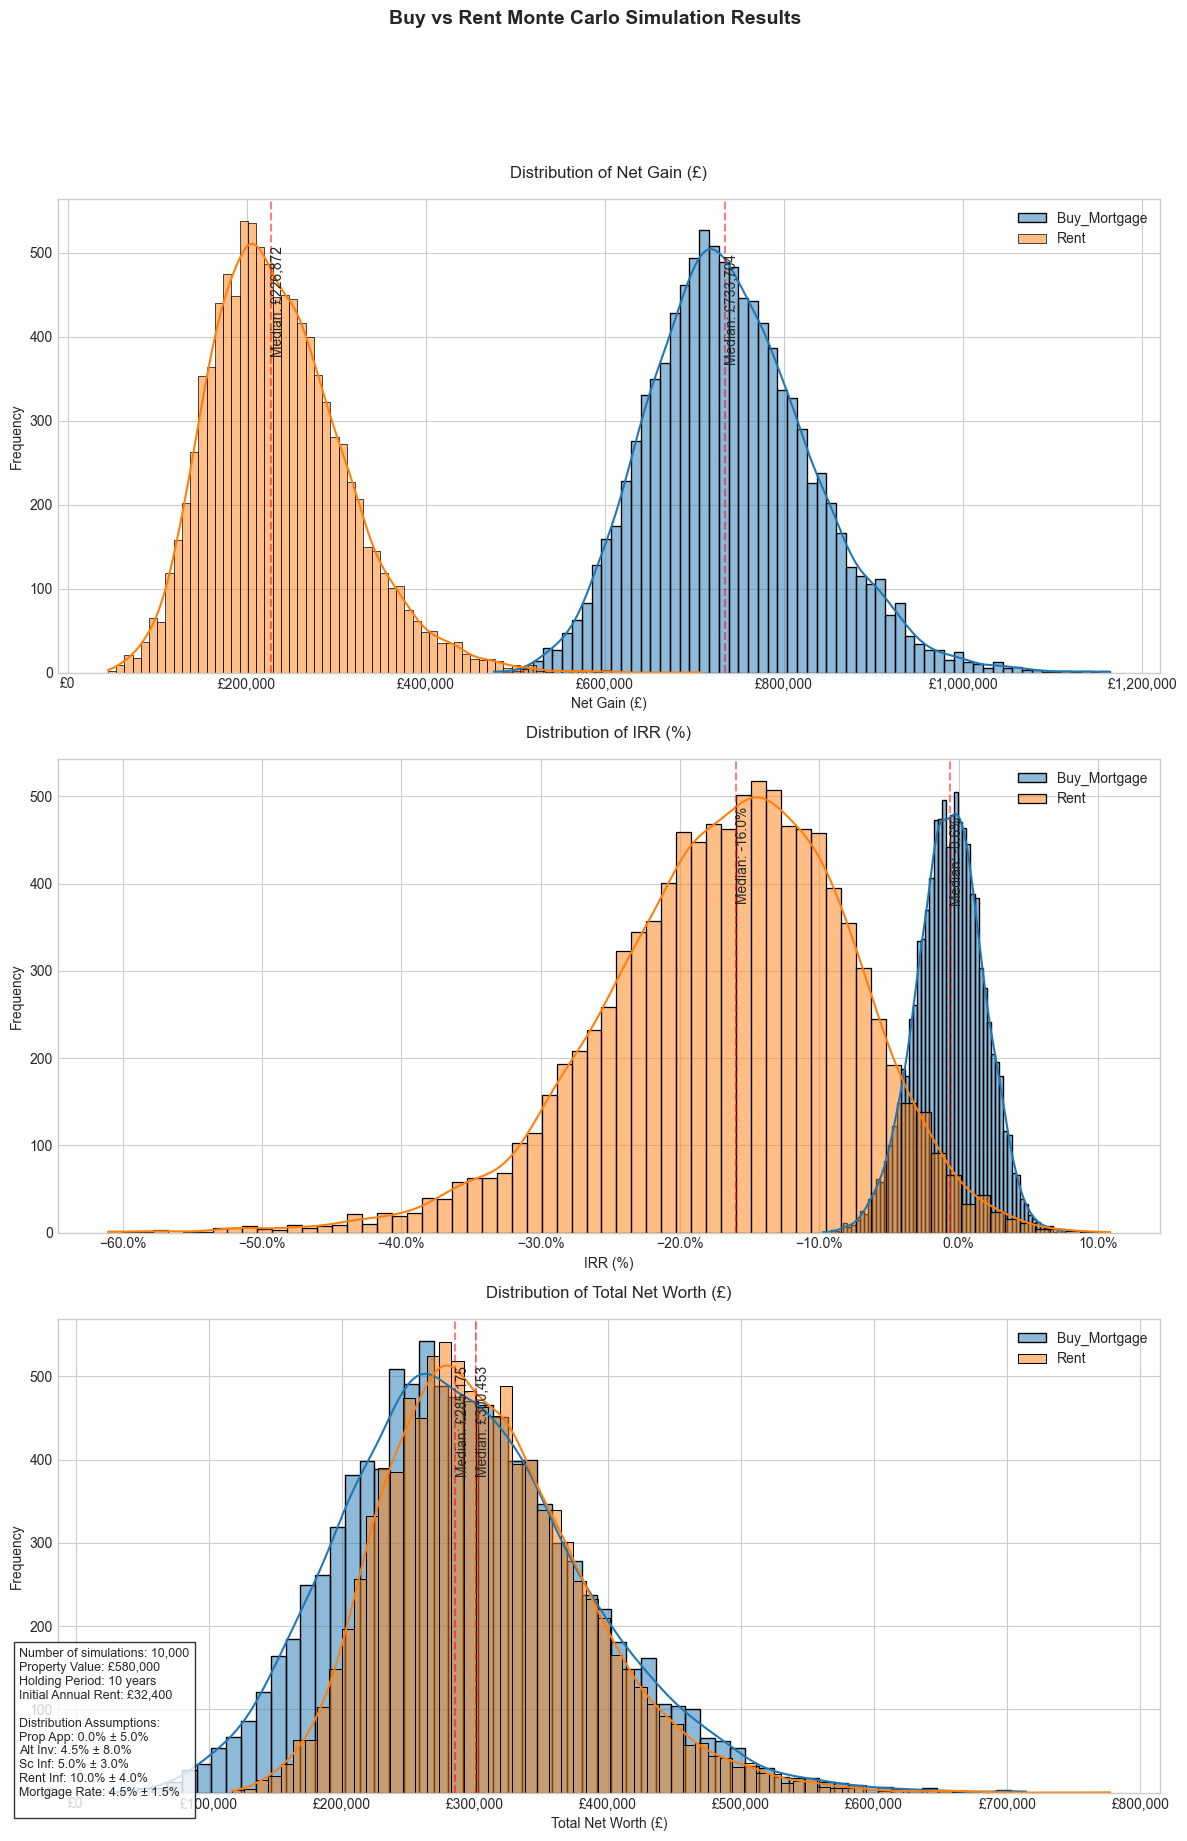

==================== END SCENARIO: STAGNANT PROPERTY - MORTGAGE ====================

Not enough cash available to buy the property outright for the cash scenario (High Inflation).

==================== SCENARIO: PROPERTY APPRECIATES (BUY VS RENT) - MORTGAGE ====================

--- Running with Configuration ---
  Number of simulations: 10,000
  Property Value Initial: £580,000
  Initial Annual Rent:    £32,400
  Holding Period:         10 years
  Initial Service Charge: £6,500 p.a.
  Mortgage Term:         25 years
  Loan-to-Value:         75%
  Initial Mortgage Rate: 4.5%
  Remortgage Interval:   5 years
  Cash Available:        £200,000

Distribution Assumptions (Mean / Std Dev):
  Property Apprec.:       7.0% / 5.0%
  Alt. Investment Ret.:    5.0% / 8.0%
  Service Chg Infl.:      5.0% / 3.0%
  Rent Inflation:         10.0% / 4.0%
  Mortgage Rate:         4.5% / 1.5%

--- Running 10,000 Simulations ---
Duration: 20.77 seconds

--- Processing Results ---

--- Analysis for: Property

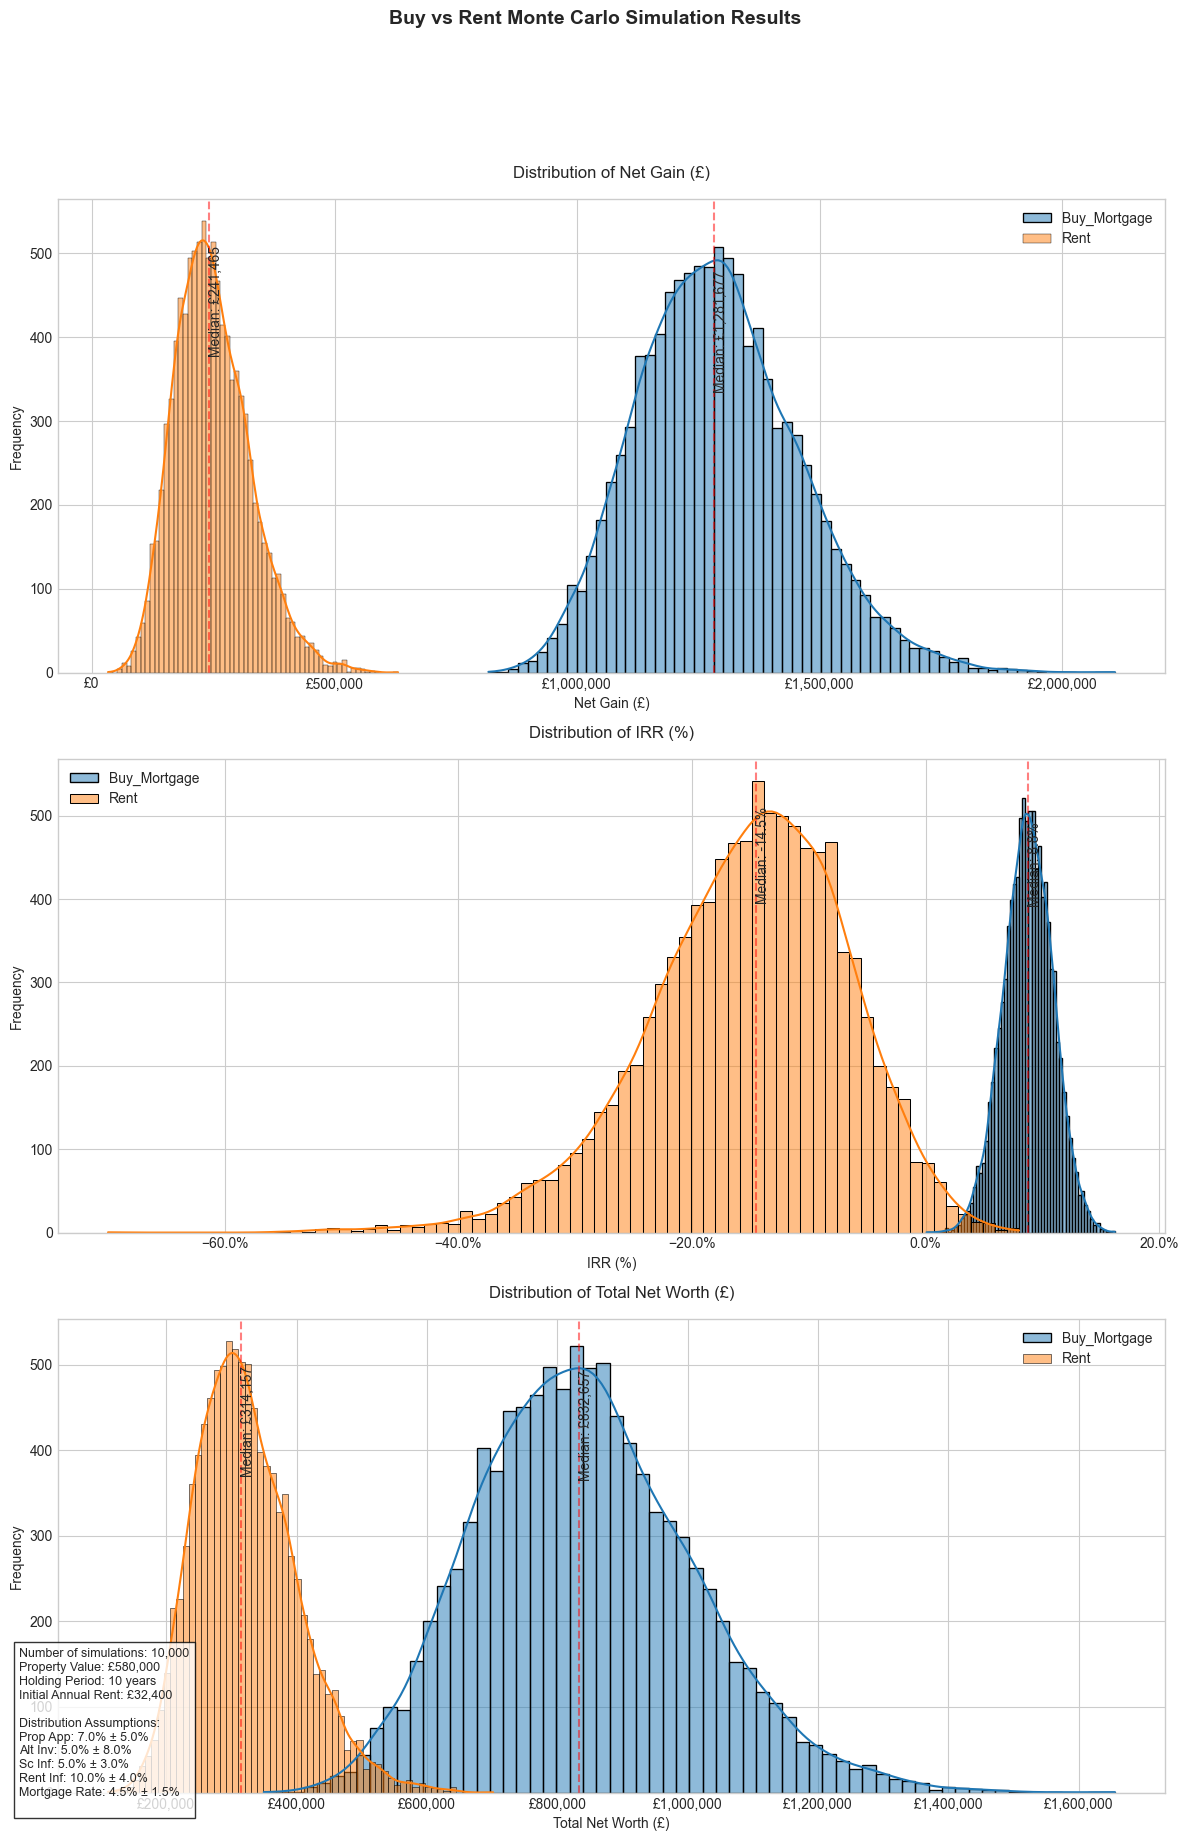

==================== END SCENARIO: PROPERTY APPRECIATES (BUY VS RENT) - MORTGAGE ====================

Not enough cash available to buy the property outright for the cash scenario (High Inflation).

=== Scenario Comparison ===

Scenario Comparison Summary:
                            Scenario     Strategy  Net Gain Mean  Net Gain Std  IRR Mean  IRR Std  Total Net Worth Mean  Total Net Worth Std
           Balanced_BuyRent_Mortgage Buy_Mortgage      937767.93     117244.33      3.56     2.23             488812.57            117894.92
           Balanced_BuyRent_Mortgage         Rent      250019.63      78094.06    -15.19     8.47             323235.35             77695.24
      HighInflation_BuyRent_Mortgage Buy_Mortgage      938097.52     117810.40      3.57     2.24             489107.29            118357.12
      HighInflation_BuyRent_Mortgage         Rent      234904.31      74334.01    -16.81     8.70             308065.31             73829.72
   StagnantProperty_BuyRent_Mortgage B

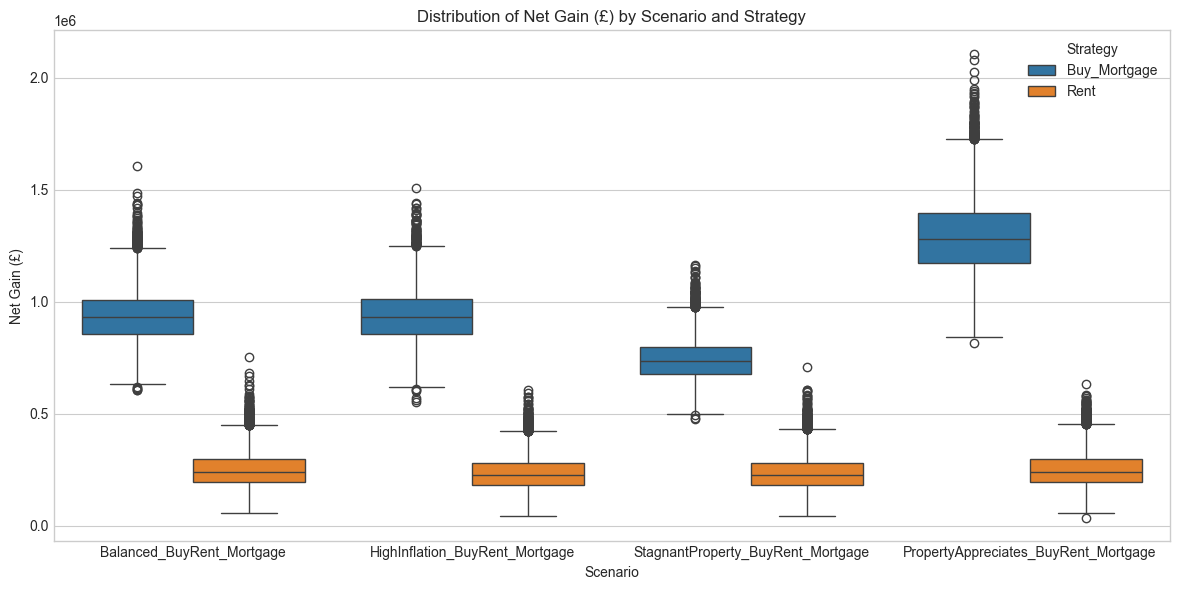

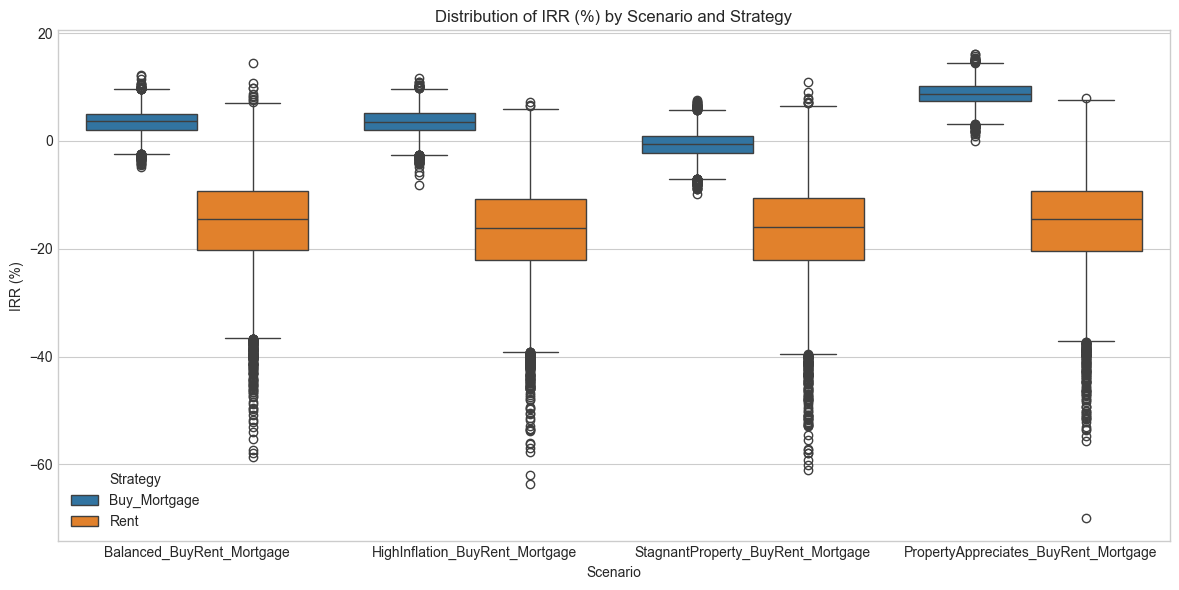

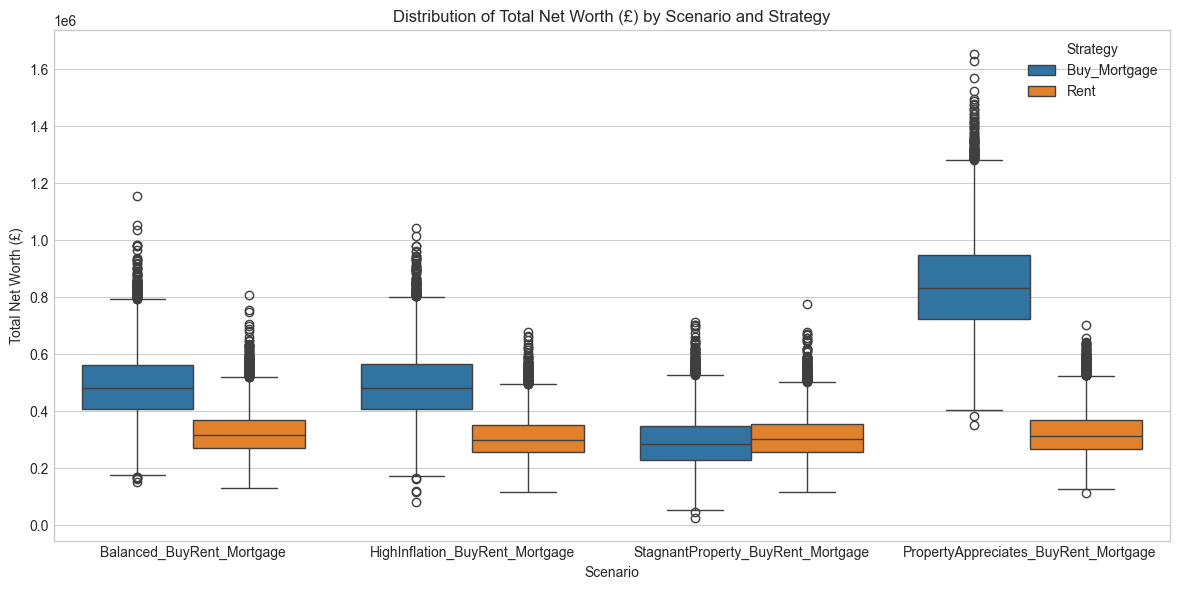

In [47]:
# --- Imports and Setup ---
%load_ext autoreload
%autoreload 2
from investment_options_mc import get_base_config_buy_vs_rent, calculate_stamp_duty
from scenario_analysis import run_and_analyze_buy_vs_rent_scenario, compare_scenarios

def can_buy_with_cash(
        property_value, cash_available, 
        buying_costs_percentage_other=0.015
        ):
    stamp_duty = calculate_stamp_duty(property_value)
    other_costs = property_value * buying_costs_percentage_other
    total_needed = property_value + stamp_duty + other_costs
    return cash_available >= total_needed

def can_afford_deposit_and_stamp_duty(
        property_value, cash_available,
        deposit_percentage=0.25,
        buying_costs_percentage_other=0.015
        ):
    deposit = property_value * deposit_percentage
    stamp_duty = calculate_stamp_duty(property_value)
    total_needed = deposit + stamp_duty
    other_costs = property_value * buying_costs_percentage_other
    total_needed += other_costs
    return cash_available >= total_needed


scenario_results_buy_rent = {}

PROPERTY_VALUE_INITIAL = 580000.0
HOLDING_PERIOD_YEARS = 10
RENT_PCM = 2700
CASH_AVAILABLE = 200000.0  # Total cash available for investment

assert can_afford_deposit_and_stamp_duty(PROPERTY_VALUE_INITIAL, CASH_AVAILABLE)

# --- Scenario 1: Balanced Outlook (Buy vs Rent) ---
config_br1_overrides = {
    "property_value_initial": PROPERTY_VALUE_INITIAL,
    "initial_annual_rent": RENT_PCM * 12,
    "holding_period_years": HOLDING_PERIOD_YEARS,
    "service_charge_annual_initial": 6500.0,
    "mortgage_term_years": 25,
    "loan_to_value_ratio": 0.75,
    "mortgage_interest_rate_annual": 0.045,
    "remortgage_interval_years": 5,
}
dist_br1_assumptions = {
    "prop_app_mean": 0.03, "prop_app_std_dev": 0.05,    # For buying
    "alt_inv_mean": 0.05, "alt_inv_std_dev": 0.08,     # For renting (investing the cash)
    "sc_inf_mean": 0.05, "sc_inf_std_dev": 0.03,   # For buying
    "rent_inf_mean": 0.10, "rent_inf_std_dev": 0.04,   # For renting
    "mortgage_rate_mean": 0.045, "mortgage_rate_std_dev": 0.015  # For mortgage rates
}

# Run with mortgage
scenario_results_buy_rent["Balanced_BuyRent_Mortgage"] = run_and_analyze_buy_vs_rent_scenario(
    "Balanced Outlook (Buy vs Rent) - Mortgage",
    config_br1_overrides,
    dist_br1_assumptions,
    cash_available=CASH_AVAILABLE,
    use_mortgage=True
)

buying_costs_percentage_other = config_br1_overrides.get("buying_costs_percentage_other", 0.015)
if can_buy_with_cash(PROPERTY_VALUE_INITIAL, CASH_AVAILABLE, buying_costs_percentage_other):
    scenario_results_buy_rent["Balanced_BuyRent_Cash"] = run_and_analyze_buy_vs_rent_scenario(
        "Balanced Outlook (Buy vs Rent) - Cash",
        config_br1_overrides,
        dist_br1_assumptions,
        cash_available=CASH_AVAILABLE,
        use_mortgage=False
    )
else:
    print("Not enough cash available to buy the property outright for the cash scenario (Balanced Outlook).")

# --- Scenario 2: High Inflation (Buy vs Rent) ---
config_br2_overrides = {
    "property_value_initial": PROPERTY_VALUE_INITIAL,
    "initial_annual_rent": RENT_PCM * 12,
    "holding_period_years": HOLDING_PERIOD_YEARS,
    "service_charge_annual_initial": 6500.0,
    "mortgage_term_years": 25,
    "loan_to_value_ratio": 0.75,
    "mortgage_interest_rate_annual": 0.045,
    "remortgage_interval_years": 5,
}
dist_br2_assumptions = {
    "prop_app_mean": 0.03, "prop_app_std_dev": 0.05,    # For buying
    "alt_inv_mean": 0.045, "alt_inv_std_dev": 0.08,     # For renting (investing the cash)
    "sc_inf_mean": 0.05, "sc_inf_std_dev": 0.03,   # For buying
    "rent_inf_mean": 0.10, "rent_inf_std_dev": 0.04,   # For renting
    "mortgage_rate_mean": 0.045, "mortgage_rate_std_dev": 0.015  # For mortgage rates
}

# Run with mortgage
scenario_results_buy_rent["HighInflation_BuyRent_Mortgage"] = run_and_analyze_buy_vs_rent_scenario(
    "High Inflation (Buy vs Rent) - Mortgage",
    config_br2_overrides,
    dist_br2_assumptions,
    cash_available=CASH_AVAILABLE,
    use_mortgage=True
)

# Run with cash
buying_costs_percentage_other = config_br2_overrides.get("buying_costs_percentage_other", 0.015)
if can_buy_with_cash(PROPERTY_VALUE_INITIAL, CASH_AVAILABLE, buying_costs_percentage_other):
    scenario_results_buy_rent["HighInflation_BuyRent_Cash"] = run_and_analyze_buy_vs_rent_scenario(
        "High Inflation (Buy vs Rent) - Cash",
        config_br2_overrides,
        dist_br2_assumptions,
        cash_available=CASH_AVAILABLE,
        use_mortgage=False
    )
else:
    print("Not enough cash available to buy the property outright for the cash scenario (High Inflation).")

# --- Scenario 3: Stagnant Property / Higher Rent ---
config_br3_overrides = {
    "property_value_initial": PROPERTY_VALUE_INITIAL,
    "initial_annual_rent": RENT_PCM * 12,
    "holding_period_years": HOLDING_PERIOD_YEARS,
    "service_charge_annual_initial": 6500.0,
    "mortgage_term_years": 25,
    "loan_to_value_ratio": 0.75,
    "mortgage_interest_rate_annual": 0.045,
    "remortgage_interval_years": 5,
}
dist_br3_assumptions = {
    "prop_app_mean": 0, "prop_app_std_dev": 0.05,    # For buying
    "alt_inv_mean": 0.045, "alt_inv_std_dev": 0.08,     # For renting (investing the cash)
    "sc_inf_mean": 0.05, "sc_inf_std_dev": 0.03,   # For buying
    "rent_inf_mean": 0.10, "rent_inf_std_dev": 0.04,   # For renting
    "mortgage_rate_mean": 0.045, "mortgage_rate_std_dev": 0.015  # For mortgage rates
}

# Run with mortgage
scenario_results_buy_rent["StagnantProperty_BuyRent_Mortgage"] = run_and_analyze_buy_vs_rent_scenario(
    "Stagnant Property - Mortgage",
    config_br3_overrides,
    dist_br3_assumptions,
    cash_available=CASH_AVAILABLE,
    use_mortgage=True
)

# Run with cash
buying_costs_percentage_other = config_br3_overrides.get("buying_costs_percentage_other", 0.015)
if can_buy_with_cash(PROPERTY_VALUE_INITIAL, CASH_AVAILABLE, buying_costs_percentage_other):
    scenario_results_buy_rent["StagnantProperty_BuyRent_Cash"] = run_and_analyze_buy_vs_rent_scenario(
        "Stagnant Property - Cash",
        config_br3_overrides,
        dist_br3_assumptions,
        cash_available=CASH_AVAILABLE,
        use_mortgage=False
    )
else:
    print("Not enough cash available to buy the property outright for the cash scenario (High Inflation).")


# --- Scenario 4: Property Value Appreciates ---
config_br4_overrides = {
    "property_value_initial": PROPERTY_VALUE_INITIAL,
    "initial_annual_rent": RENT_PCM * 12,
    "holding_period_years": HOLDING_PERIOD_YEARS,
    "service_charge_annual_initial": 6500.0,
    "mortgage_term_years": 25,
    "loan_to_value_ratio": 0.75,
    "mortgage_interest_rate_annual": 0.045,
    "remortgage_interval_years": 5,
}
dist_br4_assumptions = {
    "prop_app_mean": 0.07, "prop_app_std_dev": 0.05,    # For buying
    "alt_inv_mean": 0.05, "alt_inv_std_dev": 0.08,     # For renting (investing the cash)
    "sc_inf_mean": 0.05, "sc_inf_std_dev": 0.03,   # For buying
    "rent_inf_mean": 0.10, "rent_inf_std_dev": 0.04,   # For renting
    "mortgage_rate_mean": 0.045, "mortgage_rate_std_dev": 0.015  # For mortgage rates
}

# Run with mortgage
scenario_results_buy_rent["PropertyAppreciates_BuyRent_Mortgage"] = run_and_analyze_buy_vs_rent_scenario(
    "Property Appreciates (Buy vs Rent) - Mortgage",
    config_br4_overrides,
    dist_br4_assumptions,
    cash_available=CASH_AVAILABLE,
    use_mortgage=True
)

# Run with cash
buying_costs_percentage_other = config_br4_overrides.get("buying_costs_percentage_other", 0.015)
if can_buy_with_cash(PROPERTY_VALUE_INITIAL, CASH_AVAILABLE, buying_costs_percentage_other):
    scenario_results_buy_rent["PropertyAppreciates_BuyRent_Cash"] = run_and_analyze_buy_vs_rent_scenario(
        "Property Appreciates (Buy vs Rent) - Cash",
        config_br3_overrides,
        dist_br3_assumptions,
        cash_available=CASH_AVAILABLE,
        use_mortgage=False
    )
else:
    print("Not enough cash available to buy the property outright for the cash scenario (High Inflation).")


# Compare scenarios
compare_scenarios(scenario_results_buy_rent)